# FASE 1: COMPRENDER EL NEGOCIO

**CONTEXTO**
En un esfuerzo por mejorar la salud pública y optimizar la toma de decisiones en políticas sanitarias, el Ministerio de Salud de Chile (MINSAL) ha encargado a nuestro equipo especializado en análisis de datos y modelado predictivo una tarea crítica: realizar un análisis detallado de las tendencias y patrones de mortalidad en el país. Este proyecto se enmarca en la estrategia nacional de salud, que busca reducir las desigualdades en salud, aumentar la esperanza de vida y mejorar la calidad de vida de toda la población chilena.

El proyecto tiene como objetivo principal el desarrollo de modelos predictivos robustos que permitirán anticipar y responder de manera más efectiva a las emergentes necesidades de salud pública. Con estos modelos, el MINSAL podrá identificar con mayor precisión los grupos de mayor riesgo, las causas principales de mortalidad, y los factores determinantes de la salud, lo que facilitará la asignación de recursos y la implementación de estrategias preventivas y correctivas para mejorar la atención sanitaria y disminuir las tasas de mortalidad.

Para ello, nuestro equipo se basará en un conjunto de datos extenso que incluye registros de defunciones, diagnósticos de enfermedades, accesibilidad a servicios de salud y otros indicadores críticos. Estos datos permiten analizar las relaciones entre factores demográficos, socioeconómicos y geográficos, para proporcionar una visión holística de los desafíos de salud en el país.

Como equipo, nos centraremosen la creación de un modelo predictivo que permita determinar la causa de muerte probable según las características demográficas y otros factores asociados, lo que dotará al MINSAL de una herramienta para la planificación y priorización de políticas de salud, especialmente en zonas vulnerables y con acceso limitado a los servicios sanitarios.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [34]:
df = pd.read_csv("C:/Users/victo/OneDrive/Escritorio/DEFUNCIONES OG/DefuncionesKedro/defuncioneskedro/data/01_raw/DEFUNCIONES.csv", sep=";", encoding='ISO-8859-1')

In [35]:
dfo = df.copy()

# FASE 2: COMPRENDER LOS DATOS

Obtenemos el número total de registros disponibles en nuestro conjunto de datos. Esto nos permite saber cuántos datos tenemos para trabajar en el análisis.

In [36]:
df.shape

(341567, 27)


Mostramos una pequeña parte del conjunto de datos utilizando la función head(), que nos permite visualizar los primeros registros. Podemos especificar cuántas filas queremos ver para hacernos una idea general del contenido del dataset.


In [37]:
df.head(30)

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,2024,24-06-2024,Mujer,1,73,13604.0,Padre Hurtado,Metropolitana de Santiago,G309,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
1,2024,27-07-2024,Hombre,1,71,14101.0,Valdivia,De Los Ríos,I509,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
2,2024,28-03-2024,Hombre,1,61,6116.0,Requínoa,Del Libertador B. O'Higgins,I259,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
3,2024,02-07-2024,Mujer,1,19,13117.0,Lo Prado,Metropolitana de Santiago,Q433,Q00-Q99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
4,2024,20-07-2024,Hombre,1,77,8110.0,Talcahuano,Del Bíobío,J189,J00-J99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
5,2024,14-06-2024,Mujer,1,55,7101.0,Talca,Del Maule,C509,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
6,2024,05-08-2024,Hombre,1,73,4102.0,Coquimbo,De Coquimbo,I219,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
7,2024,16-01-2024,Mujer,2,11,13501.0,Melipilla,Metropolitana de Santiago,G403,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
8,2024,15-08-2024,Mujer,1,105,10101.0,Puerto Montt,De Los Lagos,R99X,R00-R99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
9,2024,15-05-2024,Hombre,1,102,4103.0,Andacollo,De Coquimbo,G309,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación



 Se visualizan las columnas que contienen los datos con los que posteriormente trabajaremos.

In [38]:
df.columns

Index(['ANO_DEF', 'FECHA_DEF', 'GLOSA_SEXO', 'EDAD_TIPO', 'EDAD_CANT',
       'CODIGO_COMUNA_RESIDENCIA', 'GLOSA_COMUNA_RESIDENCIA', 'GLOSA_REG_RES',
       'DIAG1', 'CAPITULO_DIAG1', 'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1',
       'GLOSA_GRUPO_DIAG1', 'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
       'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2',
       'LUGAR_DEFUNCION'],
      dtype='object')


Mostramos las últimas 5 filas de nuestro conjunto de datos para revisar cómo terminan los registros y asegurarnos de que no haya datos inesperados o faltantes al final del dataset.

In [39]:
df.tail()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
341562,2022,03-05-2022,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,C509,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341563,2022,13-02-2022,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
341564,2022,02-04-2022,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C20X,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341565,2022,08-02-2022,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C56X,C00-D48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341566,2022,06-07-2022,Mujer,1,52,6201.0,Pichilemu,Del Libertador B. O'Higgins,G122,G00-G99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


Realizamos un info() para visualizar las propiedades de las columnas, lo que nos reveló que la mayoría de ellas son de tipo object.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341567 entries, 0 to 341566
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ANO_DEF                    341567 non-null  int64  
 1   FECHA_DEF                  341567 non-null  object 
 2   GLOSA_SEXO                 341567 non-null  object 
 3   EDAD_TIPO                  341567 non-null  int64  
 4   EDAD_CANT                  341567 non-null  int64  
 5   CODIGO_COMUNA_RESIDENCIA   341563 non-null  float64
 6   GLOSA_COMUNA_RESIDENCIA    341563 non-null  object 
 7   GLOSA_REG_RES              341563 non-null  object 
 8   DIAG1                      341567 non-null  object 
 9   CAPITULO_DIAG1             341567 non-null  object 
 10  GLOSA_CAPITULO_DIAG1       341567 non-null  object 
 11  CODIGO_GRUPO_DIAG1         341567 non-null  object 
 12  GLOSA_GRUPO_DIAG1          341567 non-null  object 
 13  CODIGO_CATEGORIA_DIAG1     34

Usamos `df.isna().sum()` para identificar cuántos valores nulos (o faltantes) hay en cada columna de nuestro conjunto de datos. Esto nos permite detectar columnas con datos incompletos o vacíos, y decidir cómo manejarlos en el análisis.

In [41]:
df.isna().sum()

ANO_DEF                           0
FECHA_DEF                         0
GLOSA_SEXO                        0
EDAD_TIPO                         0
EDAD_CANT                         0
CODIGO_COMUNA_RESIDENCIA          4
GLOSA_COMUNA_RESIDENCIA           4
GLOSA_REG_RES                     4
DIAG1                             0
CAPITULO_DIAG1                    0
GLOSA_CAPITULO_DIAG1              0
CODIGO_GRUPO_DIAG1                0
GLOSA_GRUPO_DIAG1                 0
CODIGO_CATEGORIA_DIAG1            0
GLOSA_CATEGORIA_DIAG1             0
CODIGO_SUBCATEGORIA_DIAG1         0
GLOSA_SUBCATEGORIA_DIAG1          0
DIAG2                        191975
CAPITULO_DIAG2               319580
GLOSA_CAPITULO_DIAG2         319580
CODIGO_GRUPO_DIAG2           319580
GLOSA_GRUPO_DIAG2            319580
CODIGO_CATEGORIA_DIAG2       319580
GLOSA_CATEGORIA_DIAG2        319580
CODIGO_SUBCATEGORIA_DIAG2    319580
GLOSA_SUBCATEGORIA_DIAG2     319580
LUGAR_DEFUNCION                   0
dtype: int64

Con df.describe(), obtenemos un resumen estadístico de las columnas numéricas de nuestro conjunto de datos. Este resumen incluye información como el conteo de valores, la media, el valor mínimo, el valor máximo y otros datos importantes que nos ayudan a entender mejor la distribución y características de los datos.

In [42]:
df.describe()

,ANO_DEF,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA
count,341567.000000,341567.000000,341567.000000,341563.000000
mean,2022.841492,1.017888,73.266358,9730.885740
std,0.785898,0.208304,18.141500,4039.765798
min,2022.000000,0.000000,0.000000,1101.000000
25%,2022.000000,1.000000,65.000000,6114.000000
50%,2023.000000,1.000000,77.000000,10101.000000
75%,2023.000000,1.000000,86.000000,13121.000000
max,2024.000000,9.000000,121.000000,99999.000000


Año de Defunción (ANO_DEF): Para analizar tendencias temporales en las defunciones.
Sexo (GLOSA_SEXO): Para identificar diferencias de género en la mortalidad.
Edad (EDAD_CANT): Factor clave en muchas causas de muerte.
Comuna y Región de Residencia (CODIGO_COMUNA_RESIDENCIA, GLOSA_COMUNA_RESIDENCIA, GLOSA_REG_RES): Para capturar el impacto de factores geográficos y socioeconómicos.
Lugar de Defunción (LUGAR_DEFUNCION): Para agregar contexto sobre dónde ocurrió la muerte.

In [43]:
target = df['GLOSA_CAPITULO_DIAG1']

features = df[['ANO_DEF', 'GLOSA_SEXO',
                'EDAD_CANT', 'CODIGO_COMUNA_RESIDENCIA', 'GLOSA_REG_RES', 
                'LUGAR_DEFUNCION']]

Creamos un gráfico que nos permite visualizar cómo se distribuyen las defunciones según el sexo de las personas. Esto nos ayuda a identificar posibles diferencias en la cantidad de fallecimientos entre hombres y mujeres, facilitando el análisis de patrones en la mortalidad según el género.

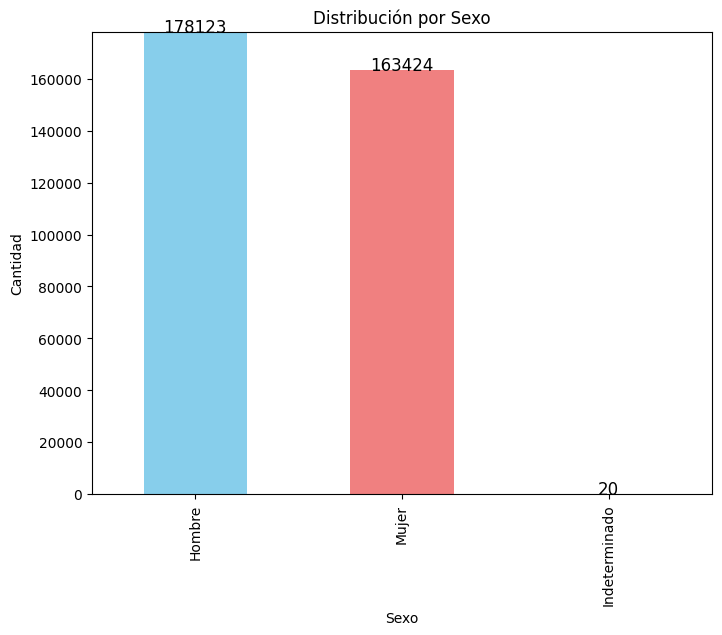

In [44]:
conteo_sexo = df['GLOSA_SEXO'].value_counts()

plt.figure(figsize=(8, 6))
barras = conteo_sexo.plot(kind='bar', color=['skyblue', 'lightcoral'])

for i, count in enumerate(conteo_sexo):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)


plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.ylim(0, conteo_sexo.max() + 10)  
plt.show()

En el gráfico que sigue, se muestra el top 5 de las causas de muerte con el mayor número de fallecimientos registrados en Chile entre los años 2022 y 2024. Esta visualización nos permite identificar las principales causas de mortalidad durante este período y analizar posibles tendencias o preocupaciones de salud pública.

C:\Users\victo\AppData\Local\Temp\ipykernel_25820\1285352821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')


Text(0.5, 1.0, 'Top 5 Enfermedades que más Muertes han Causado')

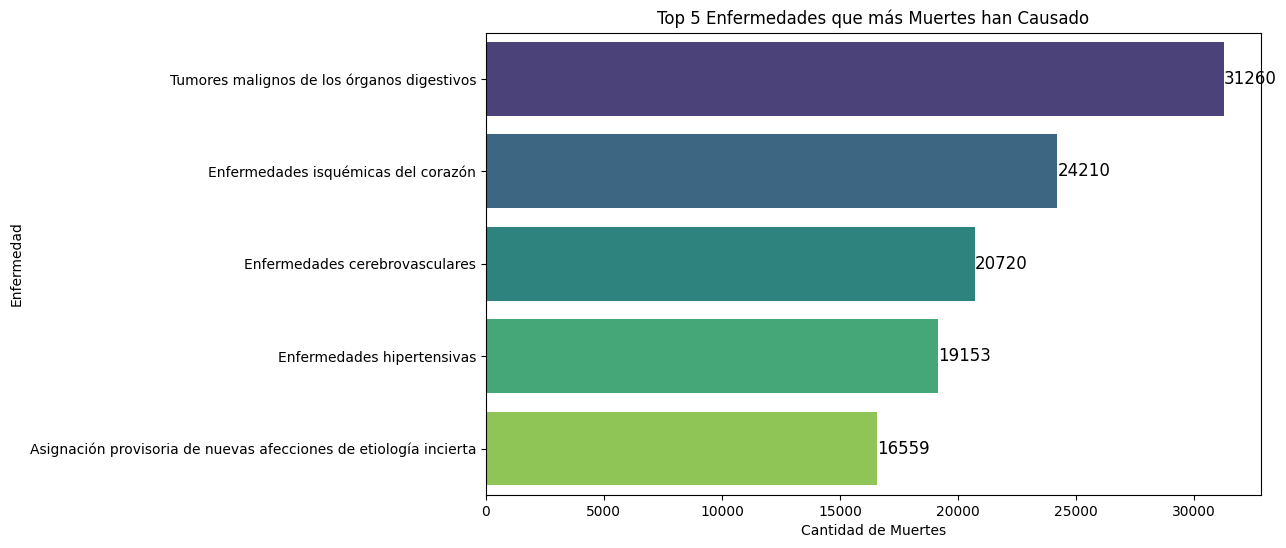

In [45]:

top_enfermedades = df['GLOSA_GRUPO_DIAG1'].value_counts().head(5) 


plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')


for i in range(len(top_enfermedades)):
    plt.text(top_enfermedades.values[i] + 0.2, i, str(top_enfermedades.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado')

Decidimos separar el gráfico anterior en dos. 

El primer gráfico desglosa el top de las causas de muerte en la Región Metropolitana, dado que su gran población puede influir en nuestro análisis. 

El segundo gráfico muestra el top de las causas de muerte en el resto de las regiones de Chile.

Como se puede observar en los gráficos, el top 3 de las principales causas de muerte se repite en todo el país. 
Sin embargo, en la Región Metropolitana, la influenza aparece como una de las principales causas de muerte, mientras que en las demás regiones no se observa esta causa a gran escala. 
En cambio, en las otras regiones se registra una mayor cantidad de defunciones bajo la categoría de "asignación provisional de nuevas afecciones de etiología incierta", lo cual no ocurre en la Región Metropolitana.

C:\Users\victo\AppData\Local\Temp\ipykernel_25820\4197529505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades_metropolitana.values, y=top_enfermedades_metropolitana.index, palette='viridis')


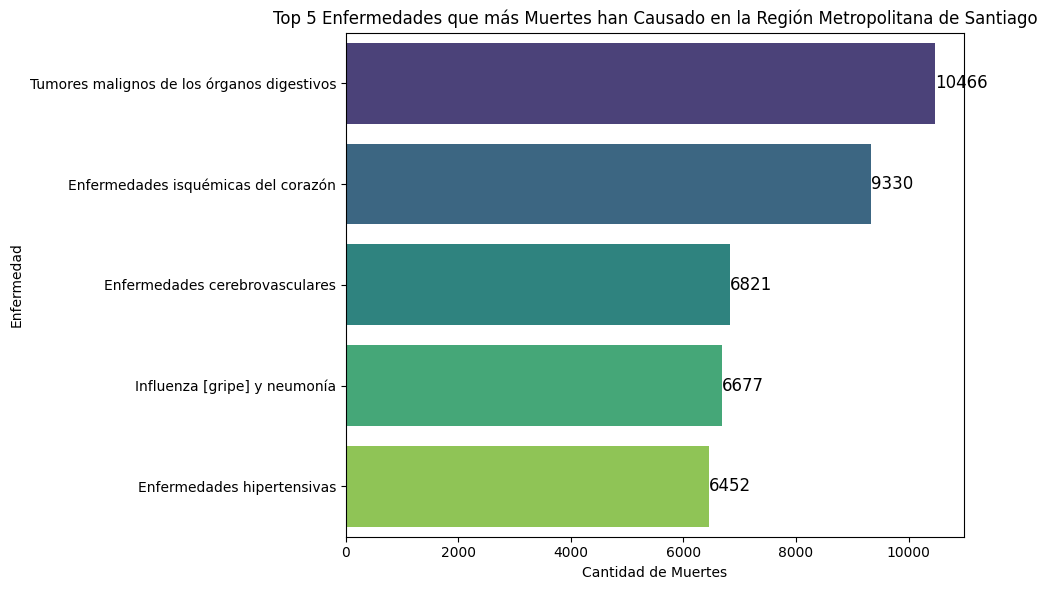

C:\Users\victo\AppData\Local\Temp\ipykernel_25820\4197529505.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades_otras_regiones.values, y=top_enfermedades_otras_regiones.index, palette='magma')


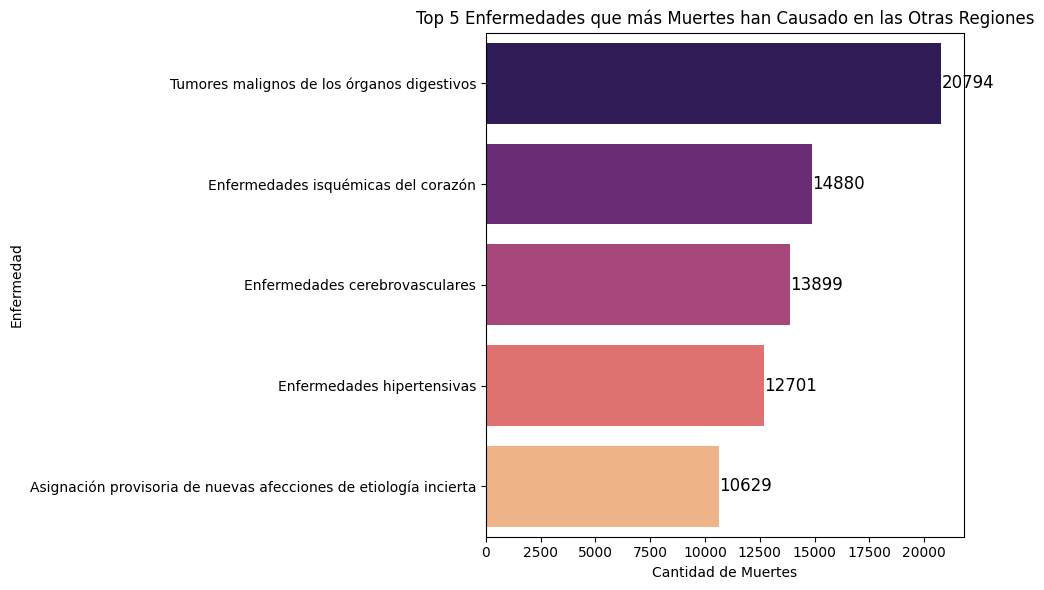

In [46]:
df_metropolitana = df[df['GLOSA_REG_RES'] == 'Metropolitana de Santiago']

top_enfermedades_metropolitana = df_metropolitana['GLOSA_GRUPO_DIAG1'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades_metropolitana.values, y=top_enfermedades_metropolitana.index, palette='viridis')

for i in range(len(top_enfermedades_metropolitana)):
    plt.text(top_enfermedades_metropolitana.values[i] + 0.2, i, str(top_enfermedades_metropolitana.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado en la Región Metropolitana de Santiago')
plt.tight_layout()

plt.show()





df_otras_regiones = df[df['GLOSA_REG_RES'] != 'Metropolitana de Santiago']

top_enfermedades_otras_regiones = df_otras_regiones['GLOSA_GRUPO_DIAG1'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades_otras_regiones.values, y=top_enfermedades_otras_regiones.index, palette='magma')

for i in range(len(top_enfermedades_otras_regiones)):
    plt.text(top_enfermedades_otras_regiones.values[i] + 0.2, i, str(top_enfermedades_otras_regiones.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado en las Otras Regiones')
plt.tight_layout()

plt.show()

Realizamos un análisis del número de defunciones por cada región y las ordenamos de mayor a menor, según la cantidad de fallecimientos. Esto nos permite identificar las regiones con más alta mortalidad y comparar cómo varía la cantidad de defunciones entre distintas áreas del país.

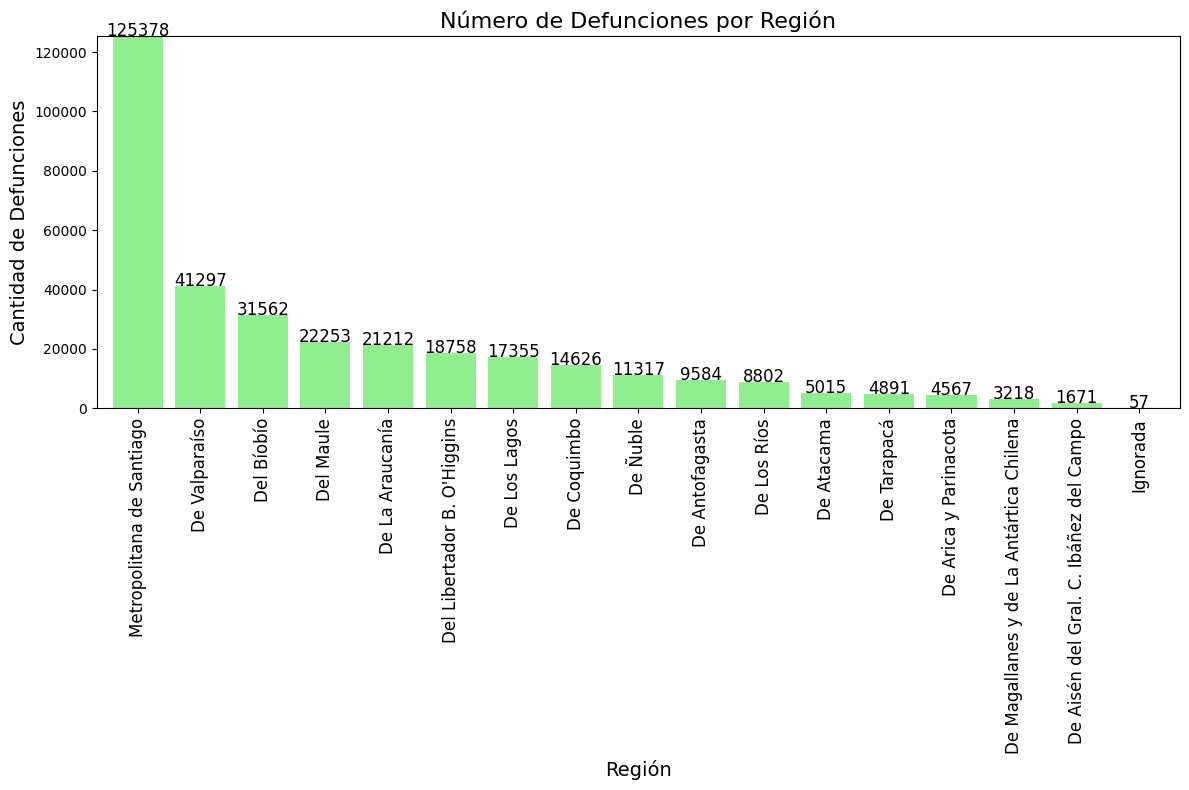

In [47]:

conteo_defunciones_region = df['GLOSA_REG_RES'].value_counts()


plt.figure(figsize=(12, 8))
barras = conteo_defunciones_region.plot(kind='bar', color='lightgreen', width=0.8)


for i, count in enumerate(conteo_defunciones_region):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)


plt.title('Número de Defunciones por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Cantidad de Defunciones', fontsize=14)
plt.ylim(0, conteo_defunciones_region.max() + 100)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()


plt.show()


El gráfico generado muestra la distribución de las edades al momento de la defunción entre los años 2022 y 2024. Se observa un pico significativo alrededor de los 80 años, lo que indica que esta es la edad más común al fallecer durante este período. Aproximadamente 38,000 defunciones se registran en torno a esta edad, sugiriendo que la mayoría de las muertes ocurren en personas de edad avanzada. 

Este dato es crucial para comprender las tendencias demográficas del país y podría influir en la planificación de políticas públicas orientadas a la atención de la población envejecida.

Además creamos una nueva columa la cual nos pasa las edades a un solo formato que seria en años, ya que anteriormente la edad se utilizaba en 4 tipos, en años, meses, dias, otros.

Ahora solo nos veeremos la edad solo en años.

C:\Users\victo\AppData\Local\Temp\ipykernel_25820\3584441774.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.91666667 0.08333333 0.16666667 0.08333333 0.75       0.66666667
 0.16666667 0.5        0.16666667 0.08333333 0.41666667 0.08333333
 0.16666667 0.5        0.66666667 0.5        0.66666667 0.16666667
 0.08333333 0.33333333 0.16666667 0.33333333 0.41666667 0.41666667
 0.33333333 0.25       0.08333333 0.16666667 0.08333333 0.75
 0.08333333 0.25       0.16666667 0.75       0.08333333 0.08333333
 0.33333333 0.16666667 0.83333333 0.08333333 0.08333333 0.66666667
 0.08333333 0.08333333 0.91666667 0.66666667 0.41666667 0.08333333
 0.58333333 0.58333333 0.16666667 0.16666667 0.58333333 0.16666667
 0.08333333 0.08333333 0.58333333 0.33333333 0.16666667 0.16666667
 0.25       0.41666667 0.41666667 0.08333333 0.16666667 0.41666667
 0.16666667 0.16666667 0.91666667 0.16666667 0.16666667 0.33333333
 0.166

   EDAD_CANT  EDAD_TIPO  EDAD_AJUSTADA
0         73          1             73
1         71          1             71
2         61          1             61
3         19          1             19
4         77          1             77


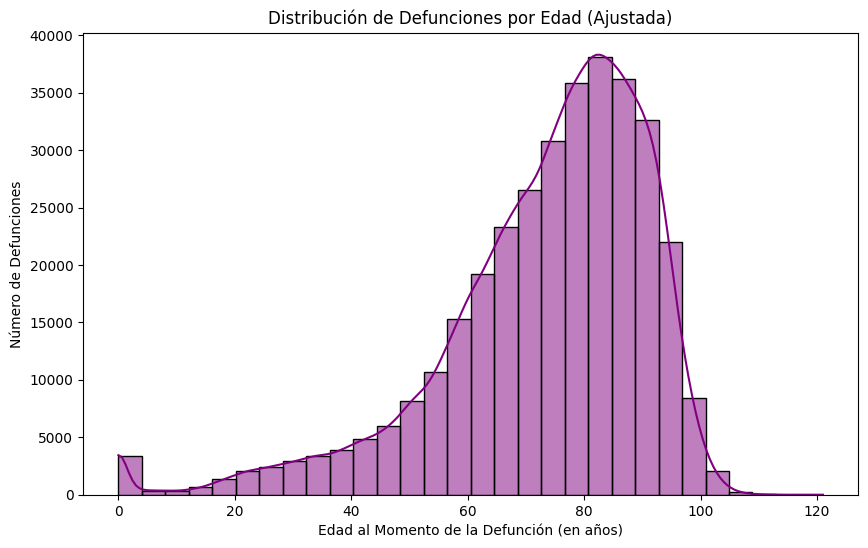

In [48]:
df['EDAD_AJUSTADA'] = df['EDAD_CANT'].copy()

df.loc[df['EDAD_TIPO'] == 2, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 12    
df.loc[df['EDAD_TIPO'] == 3, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 365   
df.loc[df['EDAD_TIPO'] == 4, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / (365 * 24)  
df.loc[df['EDAD_TIPO'] == 0, 'EDAD_AJUSTADA'] = None  

df['EDAD_AJUSTADA'] = df['EDAD_AJUSTADA'].apply(lambda x: 0 if pd.notnull(x) and x < 1 else x).astype('Int64')


print(df[['EDAD_CANT', 'EDAD_TIPO', 'EDAD_AJUSTADA']].head())

plt.figure(figsize=(10, 6))
sb.histplot(df['EDAD_AJUSTADA'].dropna(), bins=30, kde=True, color='purple')
plt.xlabel('Edad al Momento de la Defunción (en años)')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Edad (Ajustada)')
plt.show()


Existen defunciones que no cuentan con una residencia definida. Este código nos permite desglosar y visualizar cuáles son estas defunciones.

In [49]:
filas_vacias = df[df['GLOSA_COMUNA_RESIDENCIA'].isna() | (df['GLOSA_COMUNA_RESIDENCIA'] == '')]

print(filas_vacias)

       ANO_DEF   FECHA_DEF GLOSA_SEXO  EDAD_TIPO  EDAD_CANT  \
7666      2024  28-02-2024     Hombre          1         83   
29729     2024  11-04-2024     Hombre          2          1   
42733     2024  26-04-2024      Mujer          1         52   
43641     2024  26-06-2024      Mujer          2          2   

       CODIGO_COMUNA_RESIDENCIA GLOSA_COMUNA_RESIDENCIA GLOSA_REG_RES DIAG1  \
7666                        NaN                     NaN           NaN  R99X   
29729                       NaN                     NaN           NaN  R99X   
42733                       NaN                     NaN           NaN  R99X   
43641                       NaN                     NaN           NaN  R99X   

      CAPITULO_DIAG1  ... CAPITULO_DIAG2 GLOSA_CAPITULO_DIAG2  \
7666         R00-R99  ...            NaN                  NaN   
29729        R00-R99  ...            NaN                  NaN   
42733        R00-R99  ...            NaN                  NaN   
43641        R00-R99  ...   

Generamos un grafico de torta para saber los porcentajes de las defunciones del año 2022. 2023 y 2024

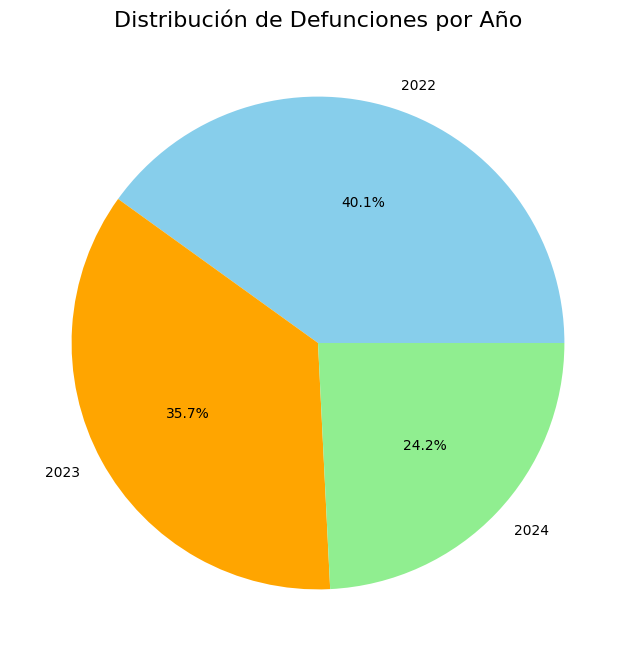

In [50]:
conteo_defunciones_ano = df['ANO_DEF'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conteo_defunciones_ano, labels=conteo_defunciones_ano.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'pink', 'yellow'])
plt.title('Distribución de Defunciones por Año', fontsize=16)
plt.show()


# FASE 3: PREPARAR LOS DATOS

Primero, eliminaremos las columnas que tienen la mayor cantidad de valores nulos. Esto es importante porque las columnas con muchos datos faltantes pueden afectar la calidad del análisis y los resultados. Al eliminarlas, nos aseguramos de trabajar con información más completa y útil.

Esta decisión fue tomada ya que estas columnas solo contienen alrededor de 20,000 datos de los más de 340,000 registros existentes, lo que representa una pequeña porción del conjunto de datos. Al tener más del 94% de sus valores faltantes, mantenerlas podría introducir ruido y dificultar la interpretación de los resultados.

In [51]:
columnas_a_eliminar = [
    'DIAG2',
    'CAPITULO_DIAG2',
    'GLOSA_CAPITULO_DIAG2',
    'CODIGO_GRUPO_DIAG2',
    'GLOSA_GRUPO_DIAG2',
    'CODIGO_CATEGORIA_DIAG2',
    'GLOSA_CATEGORIA_DIAG2',
    'CODIGO_SUBCATEGORIA_DIAG2',
    'GLOSA_SUBCATEGORIA_DIAG2',
    'CODIGO_SUBCATEGORIA_DIAG1',
    'GLOSA_SUBCATEGORIA_DIAG1',
    'DIAG1',
    'CAPITULO_DIAG1',
    'CODIGO_GRUPO_DIAG1',	
    'GLOSA_GRUPO_DIAG1',	
    'CODIGO_CATEGORIA_DIAG1',	
    'GLOSA_CATEGORIA_DIAG1'
]

df = df.drop(columns=columnas_a_eliminar, axis=1, errors='ignore')



Convertiremos las regiones a un formato numérico para facilitar su manejo en futuros análisis. Esto simplifica los cálculos y permite realizar operaciones matemáticas o estadísticas de manera más eficiente.

In [52]:
region_map = {
    'Metropolitana de Santiago': 13,
    'De Valparaíso': 5,
    'Del Bíobío': 8,
    'Del Maule': 7,
    'De La Araucanía': 9,
    'De Los Lagos': 10,
    "Del Libertador B. O'Higgins": 6,  
    'De Coquimbo': 4,
    'De Ñuble': 16,
    'De Antofagasta': 2,
    'De Los Ríos': 14,
    'De Atacama': 3,
    'De Tarapacá': 1,
    'De Arica y Parinacota': 15,
    'De Magallanes y de La Antártica Chilena': 12,
    'De Aisén del Gral. C. Ibáñez del Campo': 11,
    'Ignorada': 99
}


df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].map(region_map)

Pasaremos la columna lugar de defuncion a tipo numerico y quedaria asi:

Casa habitación = 1 \
Hospital o Clínica = 2 \
Otro = 3

In [53]:
lugar_defuncion_mapping = {
    'Casa habitación': 1,
    'Hospital o Clínica': 2,
    'Otro': 3
}

df['LUGAR_DEFUNCION'] = df['LUGAR_DEFUNCION'].map(lugar_defuncion_mapping)

Por otro lado manejaremos la columna GLOSA_CAPITULO_DIAG1 con numeros, esto es basicamente para poder manejar de mejor manera los datos y muy necesario ya que es nuestro target del proyecto.

Quedaria tal que así:

Ciertas afecciones originadas en el período perinatal = 0 \
Ciertas enfermedades infecciosas y parasitarias = 1 \
Códigos para propósitos especiales = 2 \
Embarazo, parto y puerperio = 3 \
Enfermedades de la piel y del tejido subcutáneo = 4 \
Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad = 5 \
Enfermedades del ojo y sus anexos = 6 \
Enfermedades del oído y de la apófisis mastoides = 7 \
Enfermedades del sistema circulatorio = 8 \
Enfermedades del sistema digestivo = 9 \
Enfermedades del sistema genitourinario = 10 \
Enfermedades del sistema nervioso central = 11 \
Enfermedades del sistema osteomuscular y del tejido conjuntivo = 12 \
Enfermedades del sistema respiratorio = 13 \
Enfermedades endocrinas, nutricionales y metabólicas = 14 \
Malformaciones congénitas, deformidades y anomalías cromosómicas = 15 \
Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte = 16 \
Trastornos mentales y del comportamiento = 17 \
Traumatismos, envenenamientos y algunas otras consecuencias de causas externas = 18 \
Tumores [Neoplasias] = 19 \

In [54]:
from sklearn.preprocessing import LabelEncoder

le_diag = LabelEncoder()
df['DIAG1_encoded'] = le_diag.fit_transform(df['GLOSA_CAPITULO_DIAG1'].astype(str))

Procederemos a cambiar los datos que tienen como valor Ignorada (99) y datos nulos en nuestra variable GLOSA_REG_RES, asignandole el valor de la media y moda segun corresponda tanto para la columna analizada ateriormente GLOSA_REG_RES y las variables que se relacionan directamente con esta CODIGO_COMUNA_RESIDENCIA y GLOSA_COMUNA_RESIDENCIA

In [55]:
media_codigo_comuna = int(df['CODIGO_COMUNA_RESIDENCIA'].mode())
df['CODIGO_COMUNA_RESIDENCIA'].fillna(media_codigo_comuna, inplace=True) 

media_glosa_reg_res = int(df['GLOSA_REG_RES'].mode())
df['GLOSA_REG_RES'].fillna(media_glosa_reg_res, inplace=True) 

moda_comuna = df['GLOSA_COMUNA_RESIDENCIA'].mode()[0]
df['GLOSA_COMUNA_RESIDENCIA'].fillna(moda_comuna, inplace=True) 

C:\Users\victo\AppData\Local\Temp\ipykernel_25820\2911162843.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  media_codigo_comuna = int(df['CODIGO_COMUNA_RESIDENCIA'].mode())
C:\Users\victo\AppData\Local\Temp\ipykernel_25820\2911162843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CODIGO_COMUNA_RESIDENCIA'].fillna(media_codigo_comuna, inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_25820\2911162843.py:4: Future

Las variables CODIGO_COMUNA_RESIDENCIA y GLOSA_REG_RES son de tipo Float64. Las convertiremos a tipo int para facilitar el manejo de los valores faltantes (missing values).

In [56]:
df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].fillna(0)
df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].astype(int)

df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].fillna(0)
df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].astype(int)

Detectamos los valores atípicos (aquellos que se encuentran muy alejados de la mayoría de los datos) en la columna GLOSA_REG_RES (Regiones de Chile) y las variables relacionadas, como por ejemplo algunas defunciones no contienen la localidad de esta y pertenecen a una región y comuna indefinida. Estos valores extremos pueden distorsionar nuestros resultados y generar confusión en el análisis. Por eso, decidimos eliminarlos para asegurarnos de que nuestra investigación se base en información más representativa y confiable. Esto nos ayudará a obtener conclusiones más precisas.

Podemos observar que el outlier (valor atípico) cercano a 100 corresponde a la región 'Ignorada', que se identifica con el valor 99. Este outlier cuenta con solo 57 registros, la cual se le designa a las defunciones las cuales no se registra este tipo de informacion, lo que lo aleja significativamente de las cifras de las demás regiones.

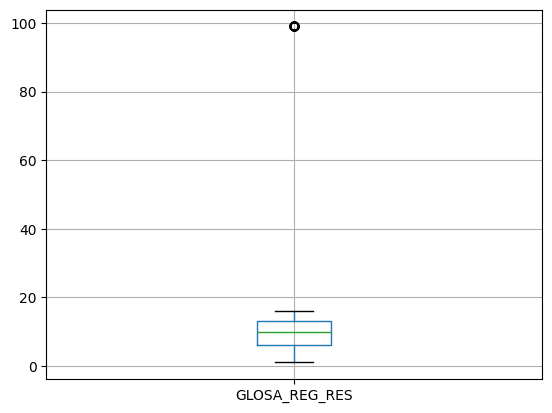

In [57]:
import matplotlib.pyplot as plt

df.boxplot(column=['GLOSA_REG_RES'])
plt.show()

Procederemos a reemplazar los datos con el valor 'Ignorada' (99) y los datos nulos en la variable GLOSA_REG_RES, asignándoles el valor de la media o la moda, según corresponda. Esto se aplicará tanto a la columna GLOSA_REG_RES como a las variables relacionadas, CODIGO_COMUNA_RESIDENCIA y GLOSA_COMUNA_RESIDENCIA.

Dado que la cantidad de datos atípicos es muy reducida, asignarles la media o la moda de su columna no tendría significado en nuestro análisis.

In [58]:
moda_codigo_comuna = df['CODIGO_COMUNA_RESIDENCIA'].mode()[0]
df['CODIGO_COMUNA_RESIDENCIA'].replace(99999, moda_codigo_comuna, inplace=True)  


moda_glosa_reg_res = df['GLOSA_REG_RES'].mode()[0]
df['GLOSA_REG_RES'].replace(99, moda_glosa_reg_res, inplace=True)


moda_comuna = df['GLOSA_COMUNA_RESIDENCIA'].mode()[0]
df['GLOSA_COMUNA_RESIDENCIA'].replace('Ignorada', moda_comuna, inplace=True) 

C:\Users\victo\AppData\Local\Temp\ipykernel_25820\3337907571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CODIGO_COMUNA_RESIDENCIA'].replace(99999, moda_codigo_comuna, inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_25820\3337907571.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

Convertiremos los datos de la columna GLOSA_SEXO a tipo entero para facilitar el trabajo con estos datos en el futuro. La codificación será la siguiente:

Hombre = 1 \
Mujer = 2 \
Indefinido = 3 \

In [59]:
df['GLOSA_SEXO'] = df['GLOSA_SEXO'].map({
    'Hombre': 1,
    'Mujer': 2,
    'Indeterminado': 3
})

print(df['GLOSA_SEXO'].head())

0    2
1    1
2    1
3    2
4    1
Name: GLOSA_SEXO, dtype: int64


Los códigos en la columna CODIGO_COMUNA_RESIDENCIA están en formato float64 (números que pueden tener decimales), pero como todos terminan con ".0", no es necesario mantener este formato. Por eso, decidimos convertirlos a formato int (entero), ya que todos los valores son números enteros sin parte decimal. Esto simplifica el manejo de los datos y los hace más claros.

In [60]:
df.dtypes

ANO_DEF                      int64
FECHA_DEF                   object
GLOSA_SEXO                   int64
EDAD_TIPO                    int64
EDAD_CANT                    int64
CODIGO_COMUNA_RESIDENCIA     int64
GLOSA_COMUNA_RESIDENCIA     object
GLOSA_REG_RES                int64
GLOSA_CAPITULO_DIAG1        object
LUGAR_DEFUNCION              int64
EDAD_AJUSTADA                Int64
DIAG1_encoded                int64
dtype: object

Pasaremos la todos los valores de la columna EDAD_TIPO a 1 (edad en años) ya que de ahora en adelante solo consideraremos las edades de las personas solamente en formato de años.

In [61]:
df['EDAD_TIPO'] = 1

print(df['EDAD_TIPO'].head())

0    1
1    1
2    1
3    1
4    1
Name: EDAD_TIPO, dtype: int64


Calculamos las estadísticas descriptivas de las edades en años utilizando la columna edad_en_anios del DataFrame. Primero, extraemos los valores de edad convertidos a años. Luego, utilizamos las funciones de NumPy para calcular tres medidas importantes: la media, la mediana y la desviación estándar de estas edades. La media nos indica la edad promedio de los fallecidos, lo que nos da una idea general de la distribución de edades. La mediana representa la edad que divide a la población en dos mitades.La desviación estándar mide la variabilidad de las edades; un valor alto sugiere que hay una amplia gama de edades entre los fallecidos, mientras que un valor bajo indica que las edades están más agrupadas alrededor de la media. Finalmente, imprimimos estos resultados para entender mejor la distribución de las edades en el conjunto de datos.

In [62]:
edades = df['EDAD_AJUSTADA']  

media_edad = np.mean(edades)
mediana_edad = np.median(edades)
desviacion_estandar = np.std(edades)

print(f"Media de edad: {media_edad:.2f} años")
print(f"Mediana de edad: {mediana_edad:.2f} años")
print(f"Desviación estándar de la edad: {desviacion_estandar:.2f} años")

Media de edad: 73.22 años
Mediana de edad: nan años
Desviación estándar de la edad: 18.31 años


Procederemos a estandarizar la variable EDAD_CANT para facilitar la comparación con las demás variables y mejorar el rendimiento de nuestros futuros algoritmos. A partir de ahora, las edades estarán expresadas en relación con su media, lo que nos permitirá entender mejor cómo se comporta esta variable en conjunto con el resto del conjunto de datos.

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['EDAD_CANT'] = scaler.fit_transform(df[['EDAD_CANT']])

Decidimos crear tres pipelines para automatizar nuestros procesos en el futuro. 
Para ejecutar los pipelines, debemos correr los comandos en la consola, estando posicionados en la carpeta del proyecto.

-Pipeline 1: sexo_int()

Función: Convierte los valores de la columna GLOSA_SEXO a datos numéricos.
Comando para correrlo: kedro run --pipeline 1


-Pipeline 2: lugar_defunciones()

Función: Convierte los valores de la columna LUGAR_DEFUNCION a datos numéricos.
Comando para correrlo: kedro run --pipeline 2


-Pipeline 3: eliminar_columnas()

Función: Elimina las columnas que contienen la mayor cantidad de datos nulos.
Comando para correrlo: kedro run --pipeline 3


# CONCLUSIONES

La Región Metropolitana de Santiago destaca significativamente con 125,378 defunciones, superando por mucho a las demás regiones. Esto podría explicarse por la densidad de población en la capital, ya que es la región más poblada del país.

Valparaíso y Biobío también presentan un número considerable de defunciones con 41,297 y 31,562 respectivamente, lo cual es esperable debido a su población relativamente alta. Por otro lado, las regiones más extremas y menos pobladas, como Aysén y Magallanes, muestran un número de defunciones significativamente menor, con cifras de 1,671 y 3,218 respectivamente.

Tumores malignos de los órganos digestivos son la principal causa de muerte, con 31,260 fallecimientos. Este dato resalta la importancia del cáncer, específicamente en los órganos digestivos, como un importante desafío de salud pública en Chile.

Las enfermedades isquémicas del corazón ocupan el segundo lugar, con 24,210 muertes. Estas enfermedades son típicas de países con hábitos de vida occidentales, asociados con una dieta rica en grasas y factores de riesgo como la hipertensión y el tabaquismo.

En tercer lugar, las enfermedades cerebrovasculares han provocado 20,720 muertes, lo que sugiere que tanto los problemas circulatorios como los accidentes cerebrovasculares son una preocupación importante en el país.

Las enfermedades hipertensivas están también dentro de las principales causas, con 19,153 fallecimientos, lo que subraya el impacto de la hipertensión arterial en la mortalidad general.

Por último, aparece la categoría de asignación provisoria de nuevas afecciones de etiología incierta, con 16,559 muertes. Este es un grupo que puede incluir muertes por causas no completamente comprendidas o enfermedades emergentes que requieren más investigación.